<a href="https://colab.research.google.com/github/spooozy/Machine-learning-methods/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

### **Dataset description**




- `ID` - Unique record ID (1–10000)
- `Age` - Age of participant (18–80 years)
- `Gender` - Male, Female
- `Country` - Country of residence (20 countries)
- `Coffee_Intake` - Daily coffee consumption in cups (0–10)
- `Caffeine_mg` - Estimated daily caffeine intake in mg (1 cup ≈ 95 mg)
- `Sleep_Hours` - Average hours of sleep per night (3–10 hours)
- `Sleep_Quality` - Poor, Fair, Good, Excellent (based on sleep hours)
- `BMI` - Body Mass Index (15–40)
- `Heart_Rate` - Resting heart rate (50–110 bpm)
- `Stress_Level` - Low, Medium, High (based on sleep hours and lifestyle)
- `Physical_Activity_Hours` - Weekly physical activity (0–15 hours)
- `Health_Issues` - None, Mild, Moderate, Severe (based on age, BMI, and sleep)
- `Occupation` - Office, Healthcare, Student, Service, Other
- `Smoking` - 0 = No, 1 = Yes
- `Alcohol_Consumption` - 0 = No, 1 = Yes

In [ ]:
DATASET_PATH = 'coffee_health.csv'

In [ ]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(5)

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [ ]:
df.dtypes

,0
ID,int64
Age,int64
Gender,object
Country,object
Coffee_Intake,float64
Caffeine_mg,float64
Sleep_Hours,float64
Sleep_Quality,object
BMI,float64
Heart_Rate,int64


### **Variable overview**

In [ ]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
0,1,40,3.5,328.1,7.5,24.9,78,14.5,0,0
1,2,33,1.0,94.1,6.2,20.0,67,11.0,0,0
2,3,42,5.3,503.7,5.9,22.7,59,11.2,0,0
3,4,53,2.6,249.2,7.3,24.7,71,6.6,0,0
4,5,32,3.1,298.0,5.3,24.1,76,8.5,0,1


In [ ]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,Gender,Country,Sleep_Quality,Stress_Level,Health_Issues,Occupation
0,Male,Germany,Good,Low,NaN,Other
1,Male,Germany,Good,Low,NaN,Service
2,Male,Brazil,Fair,Medium,Mild,Office
3,Male,Germany,Good,Low,Mild,Other
4,Female,Spain,Fair,Medium,Mild,Student


### **Processing passes**

In [27]:
missing_stats = df.isnull().sum()
missing_stats

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


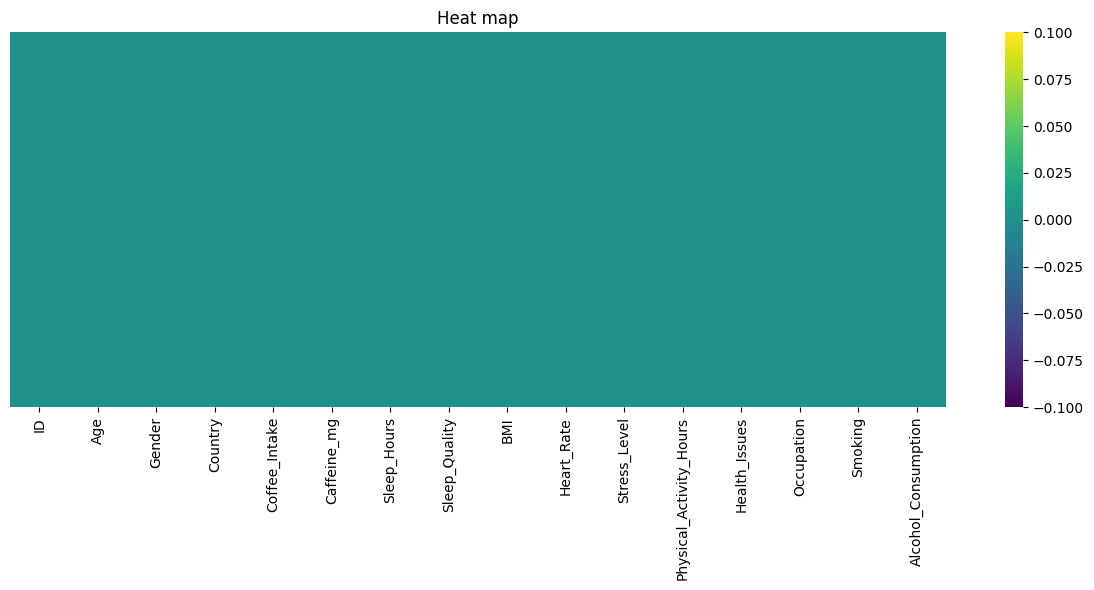

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Heat map')
plt.tight_layout()
plt.show()

Filling Health_Issues passes

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [30]:
df_clean = df.copy()

known_data = df_clean[df_clean['Health_Issues'].notna()].copy()
unknown_data = df_clean[df_clean['Health_Issues'].isna()].copy()

print(f"\nKnown data: {len(known_data)}")
print(f"Unknown data: {len(unknown_data)}")

def prepare_features(data):
    df_prep = data.copy()

    categorical_columns = ['Sleep_Quality']
    label_encoders = {}

    for col in categorical_columns:
        if col in df_prep.columns:
            le = LabelEncoder()
            if col in label_encoders:
                df_prep[col] = label_encoders[col].transform(df_prep[col])
            else:
                df_prep[col] = le.fit_transform(df_prep[col].astype(str))
                label_encoders[col] = le

    numeric_columns = ['Age','BMI']

    feature_columns = categorical_columns + numeric_columns

    return df_prep[feature_columns], label_encoders

X_known, encoders = prepare_features(known_data)
y_known = known_data['Health_Issues']

X_train, X_val, y_train, y_val = train_test_split(
    X_known, y_known, test_size=0.2, random_state=42, stratify=y_known
)

print(f"\n'Train' size: {X_train.shape}")
print(f"'Validation' size: {X_val.shape}")

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

X_unknown, _ = prepare_features(unknown_data)
predicted_health_issues = model.predict(X_unknown)

df_clean.loc[df_clean['Health_Issues'].isna(), 'Health_Issues'] = predicted_health_issues

print("\nResults:")
df_clean.to_csv('coffee_with_imputed_health_issues.csv', index=False)
print("\nResults saved in 'coffee_with_imputed_health_issues.csv'")





Known data: 4059
Unknown data: 5941

'Train' size: (3247, 3)
'Validation' size: (812, 3)

Results:

Results saved in 'coffee_with_imputed_health_issues.csv'


In [31]:
df = pd.read_csv('coffee_with_imputed_health_issues.csv', sep=',')
df.head(4)

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,Mild,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,Mild,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0


### **Proccesing outliers**

In [32]:
from scipy.stats.mstats import winsorize

#### **Outliers in quantitative data**

In [33]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])

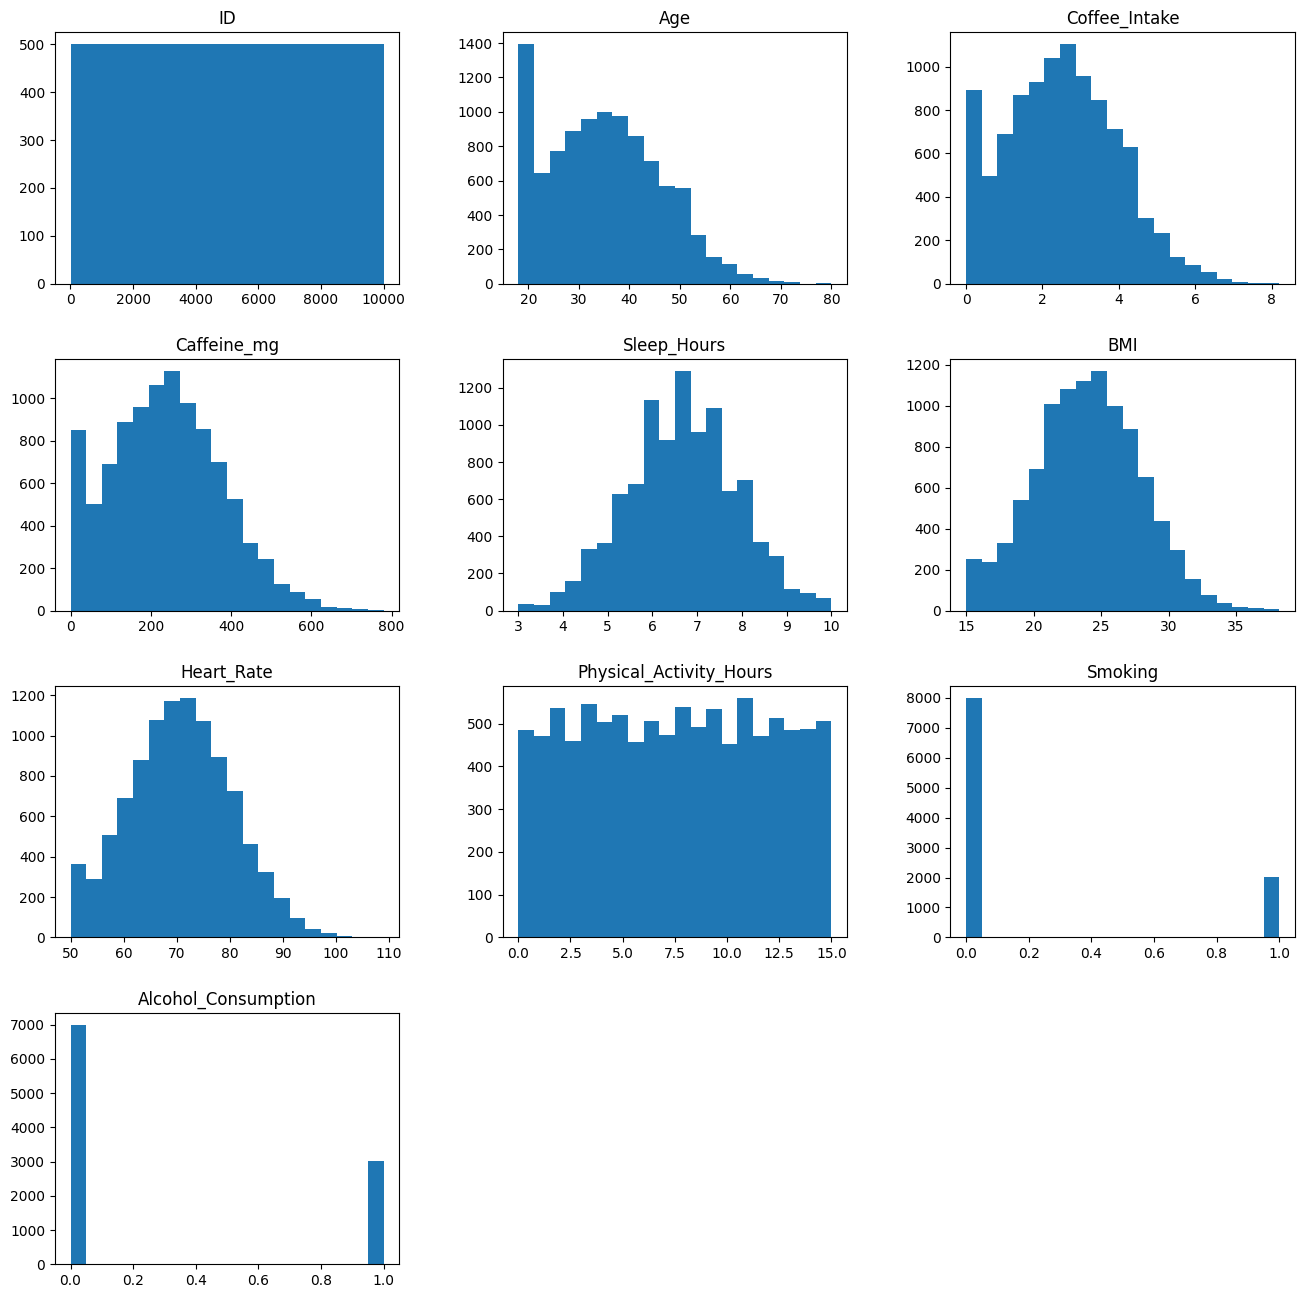

In [34]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

In [35]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
exclude_cols = ['Smoking', 'Alcohol_Consumption']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

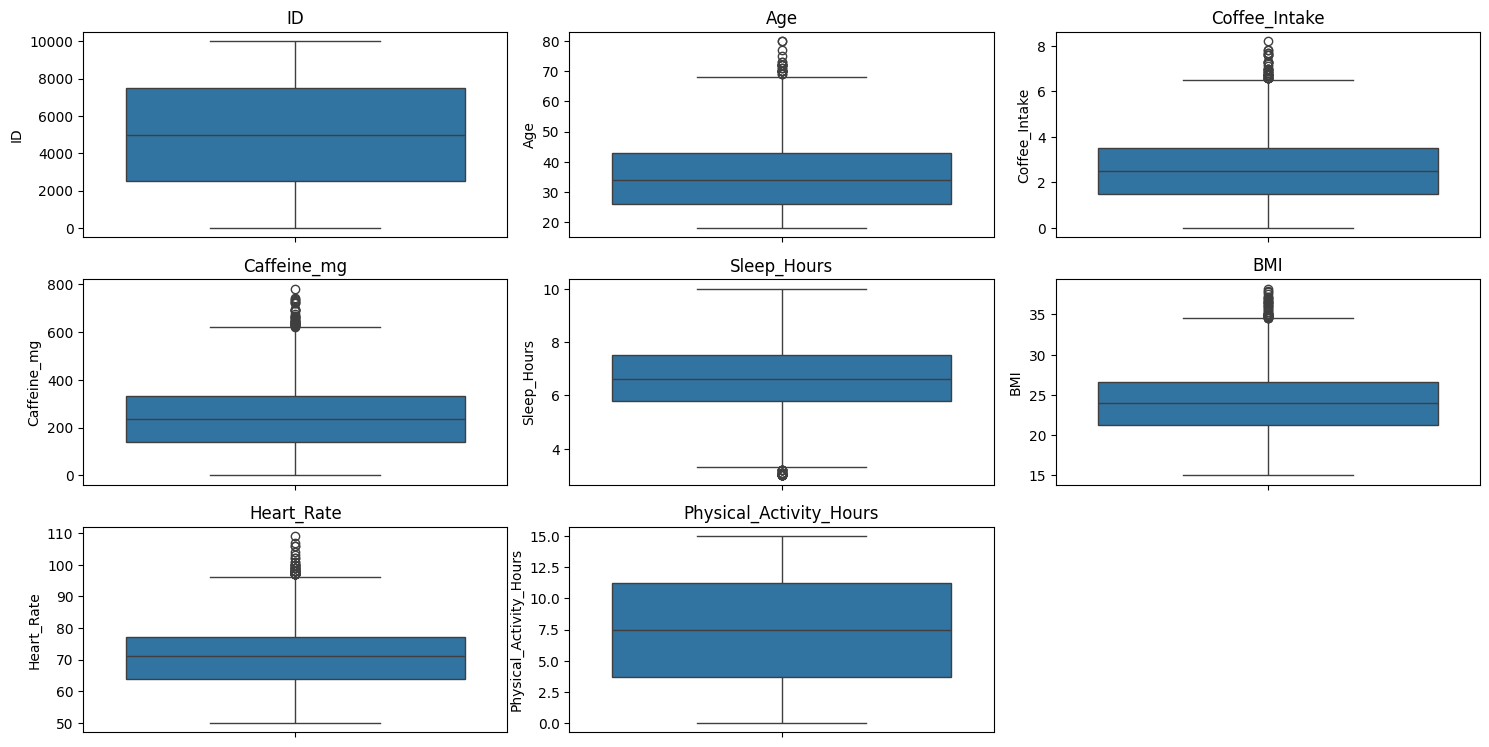

In [36]:
plt.figure(figsize = (15, 10))
for i, col in enumerate(numeric_cols, 1):
  plt.subplot(4,3,i)
  sns.boxplot(y = df[col])
  plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [37]:
def analyze_outliers_percentage(df, numeric_columns):
    outlier_analysis = {}

    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100

        outlier_analysis[col] = {
            'count': outlier_count,
            'percentage': outlier_percentage,
            'bounds': [lower_bound, upper_bound]
        }

    return outlier_analysis

In [38]:
outlier_report = analyze_outliers_percentage(df, numeric_cols)

print("Column outlier anaysis:")
print(f"{'Column':<25} {'Outlier':<10} {'%':<8}")

for col, stats in outlier_report.items():
    print(f"{col:<25} {stats['count']:<10} {stats['percentage']:<7.1f}")

Column outlier anaysis:
Column                    Outlier    %       
ID                        0          0.0    
Age                       25         0.2    
Coffee_Intake             39         0.4    
Caffeine_mg               39         0.4    
Sleep_Hours               26         0.3    
BMI                       40         0.4    
Heart_Rate                50         0.5    
Physical_Activity_Hours   0          0.0    


Since the parameters 'Age', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours' lie within the range of biological values ​​and are not measurement errors, there is little reason to exclude them.

In [39]:
df['Coffee_Intake'] = winsorize(df['Coffee_Intake'], limits = [0.02, 0.02])
df['Caffeine_mg'] = winsorize(df['Caffeine_mg'], limits = [0.02, 0.02])

In [40]:
outlier_report = analyze_outliers_percentage(df, numeric_cols)

print("Column outlier anaysis:")
print(f"{'Column':<25} {'Outlier':<10} {'%':<8}")

for col, stats in outlier_report.items():
    print(f"{col:<25} {stats['count']:<10} {stats['percentage']:<7.1f}")

Column outlier anaysis:
Column                    Outlier    %       
ID                        0          0.0    
Age                       25         0.2    
Coffee_Intake             0          0.0    
Caffeine_mg               0          0.0    
Sleep_Hours               26         0.3    
BMI                       40         0.4    
Heart_Rate                50         0.5    
Physical_Activity_Hours   0          0.0    


#### **Outliers in qualitative data**

In [58]:
df_qual_features = df.select_dtypes(include=['object'])

n_cols = len(df_qual_features.columns)
fig, axes = plt.subplots(nrows=(n_cols + 3) // 4, ncols=4, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(df_qual_features.columns):
    value_counts = df_qual_features[column].value_counts()
    value_counts.plot(kind='bar', ax=axes[i], title=column)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1200x1200 with 0 Axes>

In [42]:
gender_distribution = df[df['Gender'].isin(['Male', 'Female'])]['Gender'].value_counts(normalize=True)

other_mask = df['Gender'] == 'Other'
other_count = other_mask.sum()

random_genders = np.random.choice(
    ['Male', 'Female'],
    size=other_count,
    p=[gender_distribution.get('Male', 0.5), gender_distribution.get('Female', 0.5)]
)

df.loc[other_mask, 'Gender'] = random_genders

### **Generation of new features**

**Health_Risk_Score**

Component:
- BMI/25: deviation from ideal BMI (25)
- Stress: stress score (1-3 points)
- Age/80: relative age

The higher the value, the higher the overall health risk

In [44]:
df['Health_Risk_Score'] = (df['BMI'] / 25) + (df['Stress_Level'].map({'Low': 1, 'Medium': 2, 'High': 3}) / 3) + (df['Age'] / 80)

**Sleep_Productivity_Ratio**

Components:
- Sleep Hours
- Coffee Intake


**High values**: Lots of sleep, little coffee (natural energy)

**Low values**: Little sleep, lots of coffee (stimulant dependence)

In [45]:
df['Sleep_Productivity_Ratio'] = df['Sleep_Hours'] / (df['Coffee_Intake'] + 1)

### **Encoding of categorical features**

In [46]:
df_cat_enc = df.copy()

`Stress_Level`, `Sleep_Quality` and `Health_Issues` will encoded with **Ordinal Encoding**

In [47]:
sleep_quality_map = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
}

stress_level_map = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

health_issues_map = {
    'None': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3
}

df_cat_enc['Sleep_Quality'] = df_cat_enc['Sleep_Quality'].map(sleep_quality_map)
df_cat_enc['Stress_Level'] = df_cat_enc['Stress_Level'].map(stress_level_map)
df_cat_enc['Health_Issues'] = df_cat_enc['Health_Issues'].map(health_issues_map)

`Occupation` will be encoded with **Count Encoding** since values have unique frequency

In [ ]:
!pip install category_encoders
from category_encoders import CountEncoder

In [49]:
count_enc = CountEncoder()
df_cat_enc["Occupation"] = count_enc.fit_transform(df_cat_enc["Occupation"])

`Country` will be encoded with **Binary Encoding** since there are a lot of unique values with repetitive frequency

In [50]:
from category_encoders import BinaryEncoder

In [51]:
binary_enc = BinaryEncoder(cols=['Country'])
df_cat_enc = binary_enc.fit_transform(df_cat_enc)

`Gender` will be encoded int **True/False** values since there are only two options

In [53]:
def safe_gender_map(x):
    if x == 'Male':
        return 0
    elif x == 'Female':
        return 1
    else:
        return 0

df_cat_enc['Gender'] = df_cat_enc['Gender'].apply(safe_gender_map).astype(int)

In [54]:
df_cat_enc.head(5)

,ID,Age,Gender,Country_0,Country_1,Country_2,Country_3,Country_4,Coffee_Intake,Caffeine_mg,...,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Health_Risk_Score,Sleep_Productivity_Ratio
0,1,40,0,0,0,0,0,1,3.5,328.1,...,24.9,78,0,14.5,1,2038,0,0,1.829333,1.666667
1,2,33,0,0,0,0,0,1,1.0,94.1,...,20.0,67,0,11.0,1,1957,0,0,1.545833,3.100000
2,3,42,0,0,0,0,1,0,5.3,503.7,...,22.7,59,1,11.2,1,2073,0,0,2.099667,0.936508
3,4,53,0,0,0,0,0,1,2.6,249.2,...,24.7,71,0,6.6,1,2038,0,0,1.983833,2.027778
4,5,32,0,0,0,0,1,1,3.1,298.0,...,24.1,76,1,8.5,1,1968,0,1,2.030667,1.292683


In [55]:
df = df_cat_enc

### **Data scaling**

In [25]:
from sklearn.preprocessing import StandardScaler

In [59]:
numerical_features = [
    'Age',
    'Coffee_Intake',
    'Caffeine_mg',
    'Sleep_Hours',
    'BMI',
    'Heart_Rate',
    'Physical_Activity_Hours'
]

In [60]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

Updating dependent features

In [65]:
df['Health_Risk_Score'] = (df['BMI'] / 25) + (df['Stress_Level']) + (df['Age'] / 80)

In [63]:
df['Sleep_Productivity_Ratio'] = df['Sleep_Hours'] / (df['Coffee_Intake'] + 1)

In [66]:
df.head(5)

,ID,Age,Gender,Country_0,Country_1,Country_2,Country_3,Country_4,Coffee_Intake,Caffeine_mg,...,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Health_Risk_Score,Sleep_Productivity_Ratio
0,1,0.452574,0,0,0,0,0,1,0.703596,0.672562,...,0.233766,0.751563,0,1.625265,1,2038,0,0,0.015008,0.414923
1,2,-0.174645,0,0,0,0,0,1,-1.053110,-1.061119,...,-1.020645,-0.368319,0,0.814134,1,1957,0,0,-0.043009,6.721436
2,3,0.631779,0,0,0,0,1,0,1.968424,1.973564,...,-0.329439,-1.182779,1,0.860485,1,2073,0,0,0.994720,-0.202961
3,4,1.617409,0,0,0,0,0,1,0.071182,0.088000,...,0.182565,0.038911,0,-0.205573,1,2038,0,0,0.027520,0.507098
4,5,-0.264247,0,0,0,0,1,1,0.422523,0.449554,...,0.028964,0.547948,1,0.234755,1,1968,0,1,0.997855,-0.768687
